# Table of Contents
### 1. Import Librairies
### 2. Import Data
##### Check the data
### 3. Compare customer profiles per regions and departments.
###### Focus on department nr.4 (produce)
### 4. Export Visualizations

# 1. Import Librairies

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Import Data

In [3]:
#Create path
path = r'C:\Users\manev\Documents\Agentür für Arbeit\CareerFoundry\Data Immersion\Achievement 4\Instacart Basket Analysis'

In [4]:
#Create data frame for the "ords_final_version" data set
ords_final_version = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_final_version.pkl'))

### Check the data

In [5]:
ords_final_version.shape

(30964564, 36)

In [6]:
ords_final_version.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 36 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   order_id                         int32  
 1   user_id                          int32  
 2   order_number                     int8   
 3   orders_day_of_week               int8   
 4   order_hour_of_day                int8   
 5   days_since_prior_order           float32
 6   product_id                       int32  
 7   add_to_cart_order                int16  
 8   reordered                        int8   
 9   product_name                     object 
 10  aisle_id                         int16  
 11  department_id                    int8   
 12  prices                           float32
 13  price_range_loc                  object 
 14  busiest_day                      object 
 15  busiest_days                     object 
 16  busiest_period_of_day            object 
 17  max_order  

In [7]:
#Calculating the number of unique customers
ords_final_version.user_id.nunique()

162631

# 3. Compare customer profiles per regions and departments.

In [8]:
departments_customer_profiles= ords_final_version[['department_id', 'Customer_Profile', 'Age_Group', 'Income_Category', 'Children','user_id']]

In [9]:
departments_customer_profiles.shape

(30964564, 6)

In [10]:
departments_customer_profiles.head()

,department_id,Customer_Profile,Age_Group,Income_Category,Children,user_id
0,7,Middle-Aged Adult Low Income with Children,Middle-Aged Adult,Low_Income,With_Children,1
1,7,Middle-Aged Adult Low Income with Children,Middle-Aged Adult,Low_Income,With_Children,1
2,7,Middle-Aged Adult Low Income with Children,Middle-Aged Adult,Low_Income,With_Children,1
3,7,Middle-Aged Adult Low Income with Children,Middle-Aged Adult,Low_Income,With_Children,1
4,7,Middle-Aged Adult Low Income with Children,Middle-Aged Adult,Low_Income,With_Children,1


In [11]:
#Create data frame for the "departments_wrangled" data set
departments_index = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.pkl'))

In [12]:
departments_index

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


C:\Users\manev\AppData\Local\Temp\ipykernel_9400\4220733669.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_chart_departments.set (yticklabels=['0', '2000000', '4000000', '6000000', '8000000'])


[[Text(0, 0.0, '0'),
  Text(0, 2000000.0, '2000000'),
  Text(0, 4000000.0, '4000000'),
  Text(0, 6000000.0, '6000000'),
  Text(0, 8000000.0, '8000000'),
  Text(0, 10000000.0, '')]]

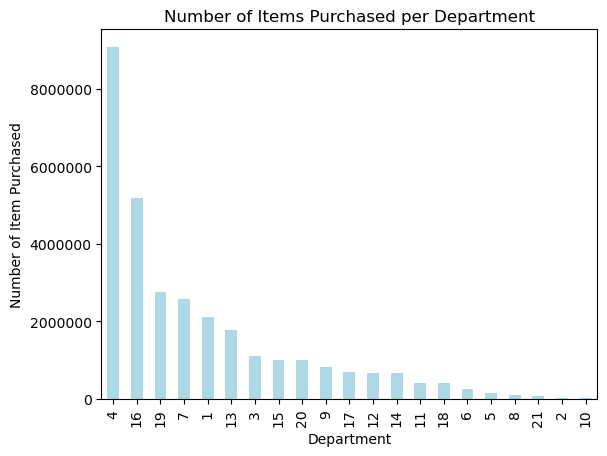

In [13]:
#Create a bar chart showing the total number of items purchased per department
bar_chart_departments = departments_customer_profiles['department_id'].value_counts().plot.bar(color='lightblue', xlabel='Department', ylabel='Number of Item Purchased',title='Number of Items Purchased per Department')
bar_chart_departments.set (yticklabels=['0', '2000000', '4000000', '6000000', '8000000'])

In [14]:
#Print the frequency of the “department_id” column to find the top 5 departments
departments_customer_profiles['department_id'].value_counts(dropna=False)

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

The top 5 departments are number 4, 16, 19, 7 and 1.

In [15]:
#Create a subset with the top 5 departments only
top_5_dpt= departments_customer_profiles.loc[departments_customer_profiles['department_id'].isin([4,16,19,7,1])]

In [16]:
#Creating a crosstable showing which customer profile purchased items from which department
crosstab_top_5_dpt = pd.crosstab(top_5_dpt['department_id'],top_5_dpt['Customer_Profile'], dropna = False)

In [17]:
crosstab_top_5_dpt.head(21)

Customer_Profile,Middle-Aged Adult High Income with Children,Middle-Aged Adult High Income without Children,Middle-Aged Adult Low Income with Children,Middle-Aged Adult Low Income without Children,Middle-Aged Adult Mid-range Income with Children,Middle-Aged Adult Mid-range Income without Children,Senior High Income with Children,Senior High Income without Children,Senior Low Income with Children,Senior Low Income without Children,Senior Mid-range Income with Children,Senior Mid-range Income without Children,Young Adult High Income with Children,Young Adult High Income without Children,Young Adult Low Income with Children,Young Adult Low Income without Children,Young Adult Mid-range Income with Children,Young Adult Mid-range Income without Children
department_id,,,,,,,,,,,,,,,,,,
1,235806,80209,195498,66032,436384,145335,164575,54950,49975,16893,208596,69261,4591,953,139325,43316,157633,52399
4,999475,342105,818549,279208,1898482,633919,702808,231943,204650,61824,905554,301325,10613,2697,570445,190061,693256,232359
7,267898,92784,288419,97881,497706,165538,190084,61721,92628,27895,232666,79026,4672,1374,176599,59737,175888,59385
16,574187,197517,470862,161522,1073259,355485,401663,128684,119256,38977,508353,171139,9557,2428,331052,107537,394617,131087
19,261937,90492,381372,128001,492458,161683,183121,60999,129608,40277,235524,79020,4280,1169,210827,69172,176841,59625


C:\Users\manev\AppData\Local\Temp\ipykernel_9400\1585219496.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_chart_top_5_departments_customer_profiles.set(xticklabels=['frozen', 'produce', 'beverages', 'dairy eggs', 'snacks'], yticklabels=['0', '250000', '500000', '750000', '1000000', '1250000', '1500000', '1750000'])


[[Text(0, 0, 'frozen'),
  Text(1, 0, 'produce'),
  Text(2, 0, 'beverages'),
  Text(3, 0, 'dairy eggs'),
  Text(4, 0, 'snacks')],
 [Text(0, 0.0, '0'),
  Text(0, 250000.0, '250000'),
  Text(0, 500000.0, '500000'),
  Text(0, 750000.0, '750000'),
  Text(0, 1000000.0, '1000000'),
  Text(0, 1250000.0, '1250000'),
  Text(0, 1500000.0, '1500000'),
  Text(0, 1750000.0, '1750000'),
  Text(0, 2000000.0, '')]]

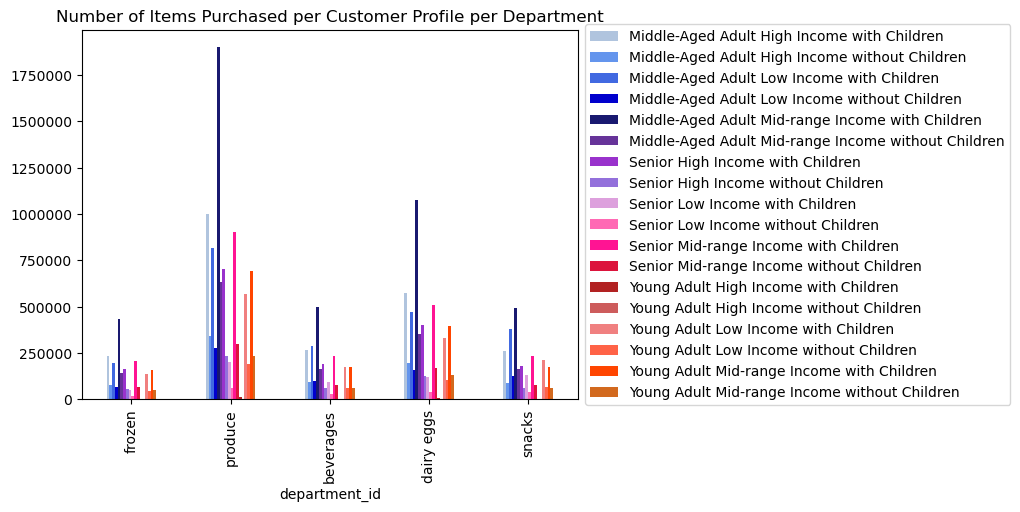

In [18]:
bar_chart_top_5_departments_customer_profiles = crosstab_top_5_dpt.plot.bar(color=['lightsteelblue', 'cornflowerblue','royalblue', 'mediumblue','midnightblue', 'rebeccapurple', 'darkorchid', 'mediumpurple','plum', 'hotpink', 'deeppink', 'crimson', 'firebrick','indianred', 'lightcoral', 'tomato', 'orangered', 'chocolate'],title='Number of Items Purchased per Customer Profile per Department')
bar_chart_top_5_departments_customer_profiles.legend(loc='center left',bbox_to_anchor=(1, 0.5))
bar_chart_top_5_departments_customer_profiles.set(xticklabels=['frozen', 'produce', 'beverages', 'dairy eggs', 'snacks'], yticklabels=['0', '250000', '500000', '750000', '1000000', '1250000', '1500000', '1750000'])

In [19]:
#Create a subset with only the top 5 customer profiles
top_5profiles= top_5_dpt.loc[top_5_dpt['Customer_Profile'].isin(['Middle-Aged Adult Mid-range Income with Children', 'Middle-Aged Adult High Income with Children', 'Middle-Aged Adult Low Income with Children', 'Senior Mid-range Income with Children', 'Senior High Income with Children'])]

In [20]:
#Creating a crosstable showing which customer profile purchased items from which department
crosstab_top_5_dpt_top_profiles = pd.crosstab(top_5profiles['department_id'],top_5profiles['Customer_Profile'], dropna = False)

In [21]:
crosstab_top_5_dpt_top_profiles.head()

Customer_Profile,Middle-Aged Adult High Income with Children,Middle-Aged Adult Low Income with Children,Middle-Aged Adult Mid-range Income with Children,Senior High Income with Children,Senior Mid-range Income with Children
department_id,,,,,
1,235806,195498,436384,164575,208596
4,999475,818549,1898482,702808,905554
7,267898,288419,497706,190084,232666
16,574187,470862,1073259,401663,508353
19,261937,381372,492458,183121,235524


C:\Users\manev\AppData\Local\Temp\ipykernel_9400\2735509157.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_chart_top_5_departments_top_customer_profiles.set_yticklabels(['0', '250000', '500000', '750000', '1000000', '1250000', '1500000', '1750000'])


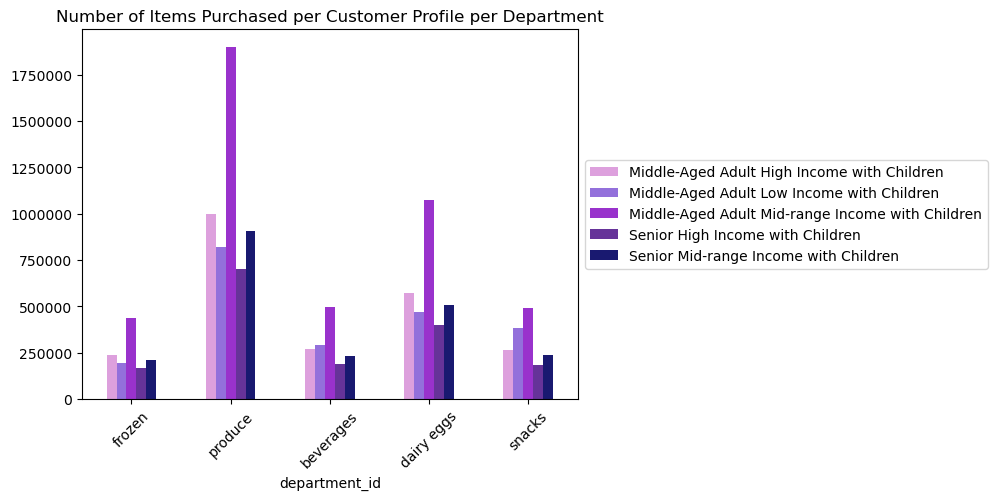

In [27]:
#Creting a bar chart showing the number of items purchased per customer profile per department, for the top 5 customer profiles and top 5 departments in the data set
bar_chart_top_5_departments_top_customer_profiles = crosstab_top_5_dpt_top_profiles.plot.bar(color=['plum','mediumpurple','darkorchid','rebeccapurple','midnightblue'],title='Number of Items Purchased per Customer Profile per Department')

bar_chart_top_5_departments_top_customer_profiles.legend(loc='center left', bbox_to_anchor=(1, 0.5))
bar_chart_top_5_departments_top_customer_profiles.set_xticklabels(['frozen', 'produce', 'beverages', 'dairy eggs', 'snacks'], rotation=45)

bar_chart_top_5_departments_top_customer_profiles.set_yticklabels(['0', '250000', '500000', '750000', '1000000', '1250000', '1500000', '1750000'])
plt.savefig("bar_chart_top_5_departments_top_customer_profiles.png") 

In [28]:
#look for the current directory where the visualizations are being saved
cwd = os.getcwd()
cwd

'C:\\Users\\manev\\Documents\\Agentür für Arbeit\\CareerFoundry\\Data Immersion\\Achievement 4\\Instacart Basket Analysis\\03 Scripts'

# 4. Export Visualizations

In [18]:
#Exporting visualizations
bar_chart_top_5_departments_customer_profiles.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_top_5_departments_customer_profiles.png'))
bar_chart_departments.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_departments.png'))
bar_chart_top_5_departments_top_customer_profiles.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_top_5_departments_top_customer_profiles.png'))